# Final Project

## Data Preprocessing

In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import re
import os
import shap
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc

# Basline Model
from sklearn.linear_model import LogisticRegression

# Tree-Based Models
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Scaling (for Logistic Regression)
from sklearn.preprocessing import StandardScaler

In [3]:
# load all datasets and set certain arguments to read the data correctly.
contract = pd.read_csv("datasets/final_provider/contract.csv")
internet = pd.read_csv("datasets/final_provider/internet.csv")
personal = pd.read_csv("datasets/final_provider/personal.csv")
phone = pd.read_csv("datasets/final_provider/phone.csv")

In [4]:
# Display the first 5 rows of all the DataFrames
display(contract.head())
display(internet.head())
display(personal.head())
display(phone.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [5]:
# Determining the size of all the DataFrames

# Display the shape of all the DataFrame 
n_rows, n_cols = contract.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

# Display the shape of all the DataFrame 
n_rows, n_cols = personal.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

# Display the shape of all the DataFrame 
n_rows, n_cols = phone.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

# Display the shape of all the DataFrame 
n_rows, n_cols = internet.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 7043 rows and 8 columns
The DataFrame has 7043 rows and 5 columns
The DataFrame has 6361 rows and 2 columns
The DataFrame has 5517 rows and 8 columns


In [6]:
# Function to rename the column names in all DataFrames
def columns(name):
    return re.sub(r'(?<=[a-z])(?=[A-Z])', '_', name).lower()

In [7]:
# Apply to all column names
contract.columns = [columns(col) for col in contract.columns]
internet.columns = [columns(col) for col in internet.columns]
personal.columns = [columns(col) for col in personal.columns]
phone.columns = [columns(col) for col in phone.columns]

Used the above function to keep the column names consistent with Python best practices ab. 

In [8]:
# Display informative summary of the 'contract' DataFrame
contract.info()

# Display descriptive statistics of the 'contract' DataFrame
contract.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [9]:
# Display informative summary of the 'personal' DataFrame
personal.info()

# Display descriptive summary of the 'personal' DataFrame
personal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,senior_citizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
# Display informative summary of the 'phone' DataFrame
phone.info()

# Display descriptive summary of the 'phone' DataFrame
phone.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


In [11]:
# Display informative summary of the 'internet' DataFrame
internet.info()

# Display descriptive summary of the 'internet' DataFrame
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [12]:
# Merging all the datasets together
final = contract.merge(personal, on='customer_id', how='outer') \
             .merge(internet, on='customer_id', how='outer') \
             .merge(phone, on='customer_id', how='outer')

# Display head of the 'final' datasets
display(final.head(5))

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,0002-ORFBO,2019-05-01,No,One year,Yes,Mailed check,65.6,593.3,Female,0,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,No
1,0003-MKNFE,2019-05-01,No,Month-to-month,No,Mailed check,59.9,542.4,Male,0,No,No,DSL,No,No,No,No,No,Yes,Yes
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,No,Fiber optic,No,No,Yes,No,No,No,No
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,83.9,267.4,Female,1,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,No


In [13]:
# Display the shape of the 'final' DataFrame 
n_rows, n_cols = final.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 7043 rows and 20 columns


The above code is used to merge multiple datasets into a single DataFrame called `final`, aligning all data by the common key - `customer_id`. 

In [14]:
# Check for missing values in 'final' DataFrame
final.isna().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

It shows that the number of missing values (NaN) in each column of the `final` merged DataFrame. It tells that there are 1526 customers with no internet service data and thus all columns from `internet` DataFrame have missing values. Along with this, there are 682 customers with no phone service data and so `mulitple_lines` from `phone` DataFrame have missing values. 
This may indicate:
    - They didn't subscribe to those services. 
    - Data might be missing or wasn't collected. 

In [15]:
# Check for duplicates in the 'final' DataFrame
final.duplicated().sum()

0

In [16]:
# Check for duplicates in the 'final' DataFrame `customer_id` column
final['customer_id'].duplicated().sum()

0

The above codes for duplicates shows that there are no completely duplicated rows in the `final` DataFrame. Another line of code shows that each `customer_id` is unique and the data is properly structured. It also suggests that the mergering all the datasets didn't create any unintended duplicates. 

In [17]:
# Convert the 'begin_date' column to datetime format. 
final['begin_date'] = pd.to_datetime(final['begin_date'])

Converts the `begin_date` column into date-time format which enables time-based operations and easy to calculate customer tenure. 

In [18]:
# Count the frequency of each unique value in the 'total_charges' column
final['total_charges'].value_counts()

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [19]:
final['total_charges'].isnull().sum()

0

In [20]:
# Remove whitespace in the 'total_charges' column
final['total_charges'] = final['total_charges'].str.strip()

# Replace empty strings with NaN
final['total_charges'] = final['total_charges'].replace('', np.nan)

# Convert the 'total_charges' column to float 
final['total_charges'] = final['total_charges'].astype(float)

The `total_charges` column looked numeric, so tried to convert the datatype, when I got error informing that the column consist of strings (empty strings) and this its unable to convert it into numeric. So, used `value_counts` to inspect the data to determine what kind of strings are present in the column. Doing this informed that there are empty strings present. So, used the above codes to remove any spaces and convert them to `Nan`. Lastly, converted the missing values to float which is crucial for numerical analysis. 

In [21]:
# Fill missing values with 'No' in the columns mentioned below
final[['internet_service', 'online_backup', 'online_security', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines']] = final[['internet_service', 'online_backup', 'online_security', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines']].fillna(value='No')

I considered to drop all the rows with missing values in any columns, but that would remove much of the dataset from the analysis. In term of real-world prespective, missing values in these service columns usually mean the customer did not subscribe to the service. So using `fillna` I filled the missing values with `No` which I thought is an appropriate and meaningful replacement. Filling the missing values makes model training and evaluation easy. 

In [22]:
# Drop rows with missing values in 'final' DataFrame
final = final.dropna()

After dropping missing values from categorical columns from `internet` and `phone` DataFrames, 11 rows which were cleaned and converted to `NaN` in `total_charges` column were left and as it reflects to much smaller percentage of the `final` DataFrame, I decided to dropped those rows. 

In [23]:
# Check for missing values in 'final' DataFrame 
final.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

The above code for missing values confirms that the `final` DataFrame no longer has any missing values (`NaN`) in any column. Thus now the dataset is safe for analysis and model training. 

In [24]:
# Display the informative summary of the 'final' DataFrame
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7032 non-null   object        
 1   begin_date         7032 non-null   datetime64[ns]
 2   end_date           7032 non-null   object        
 3   type               7032 non-null   object        
 4   paperless_billing  7032 non-null   object        
 5   payment_method     7032 non-null   object        
 6   monthly_charges    7032 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7032 non-null   object        
 9   senior_citizen     7032 non-null   int64         
 10  partner            7032 non-null   object        
 11  dependents         7032 non-null   object        
 12  internet_service   7032 non-null   object        
 13  online_security    7032 non-null   object        
 14  online_backup

In [25]:
# Display descriptive statistics of the 'final' DataFrame
final.describe()

,begin_date,monthly_charges,total_charges,senior_citizen
count,7032,7032.000000,7032.000000,7032.000000
mean,2017-04-28 23:14:44.641638400,64.798208,2283.300441,0.162400
min,2013-10-01 00:00:00,18.250000,18.800000,0.000000
25%,2015-06-01 00:00:00,35.587500,401.450000,0.000000
50%,2017-09-01 00:00:00,70.350000,1397.475000,0.000000
75%,2019-04-01 00:00:00,89.862500,3794.737500,0.000000
max,2020-01-01 00:00:00,118.750000,8684.800000,1.000000
std,NaN,30.085974,2266.771362,0.368844


After merging all the datasets and applying thorough preprocessing, the resulting `final` dataFrame contains 7032 customers records across 20 columns. All missing values have been addressed - all missing values in categorical columns were filled with appropriate deafaults for categorical service features (e.g. `No` for `internet` and `phone` serivces) and lastly dropped 11 rows which had missing values in `total_charges`.

Key transformations included: 
    - Converting `begin_date` to datetime format for proper anaylsis. 
    - Cleaning and converting `total_charges` from string to float. 
    - Ensured no null values remain, with correct datatypes for every feature.

In [26]:
# Calculate the share of customers who didn't leave
len(final[final['end_date'] == 'No']) / len(final['end_date'])

0.7342150170648464

After preprocessing, I wanted to determine the proportion of share of customers who didn't leave. So using the above code I calculated the share of customers who are not churned yet. The result is 0.74% representing that 74% of customers are still with the company, while the remaining 26% have churned. Calculating this gave me a baseline for modeling that is how imbalanced is the data. Knowing this helps me to plan the next steps in training the model. 

In [27]:
# Create a new boolean column ' churn'
final['churn'] = final['end_date'] != 'No'

In [28]:
# Display the count of each unique values in 'churn' column
final['churn'].value_counts()

churn
False    5163
True     1869
Name: count, dtype: int64

In [29]:
# Convert the 'churn' column to integer format.
final['churn'] = final['churn'].astype(int)

To being the analysis, I created a new column called `churn` column which is derived from the `end_date` column, to identify whether a customer has left the service. The project is based on to determine whether the customers who are still active will leave in future. If a customer's `end_date` was not `No`, it indicated that the customer had left the service, so I marked them as `True` (churned) otherwise marked them as `False` (active). 

Next, I examined the distribution of active vs inactive customers using `value_counts()` to understand the overall retention rate. To prepare the data for machine learning models, I then converted the boolean values in the `churn` column to integers - with `1` representing a churned customer and `0` representing an active one. 

This transformation made the data more interpretable for analysis.

## Data Analysis

Text(0.5, 1.0, 'Has the Customer Left?')

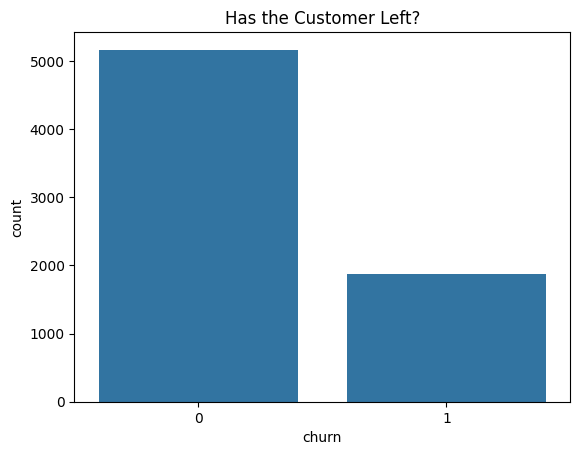

In [30]:
# Create a bar plot showing the count of customers who have churned vs. not churned
sns.countplot(x='churn', data=final)
plt.title('Has the Customer Left?')

To better understand customer churn behavior, I created a bar chart of the `churn` column. This clearly shows that the majority of customers remained with the company. Roughly, 73% of customers did not churn, while 27% did. This class imbalance is important to understand as it may influence the performance of classification models. 

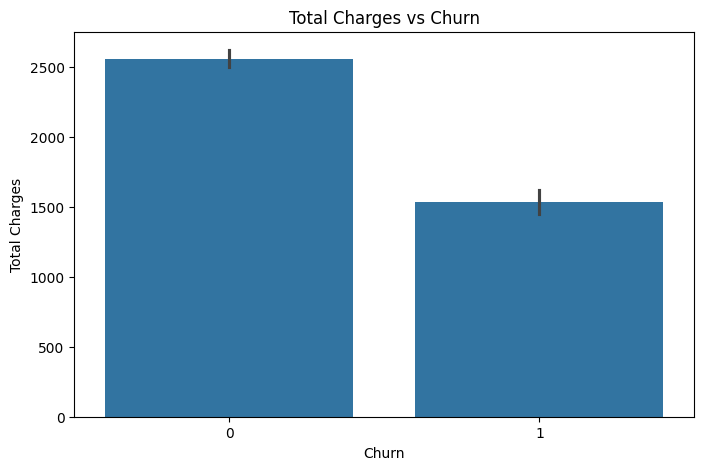

In [31]:
# Create a bar plot showing the affect of 'total_charges' on  who have churned vs. not churned
plt.figure(figsize=(8, 5))
sns.barplot(x='churn', y='total_charges', data=final)
plt.title('Total Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

To understand the relationship between customer churn and revenue, I graph the average total charges for churned and non-churned customers. The graph shows that customers who stayed in the company have significantly higher total charges compared to those who left. This suggests that longer-tenured customers tend to accumulate more charges and are less likely to churn, while customers who leave tend to do so earlier in their lifecycle, resulting in lower total charges. This implies that engaging new users early to increase lifetime value and reduce churn. 

Text(0.5, 1.0, 'Churn Rate by Contract Type')

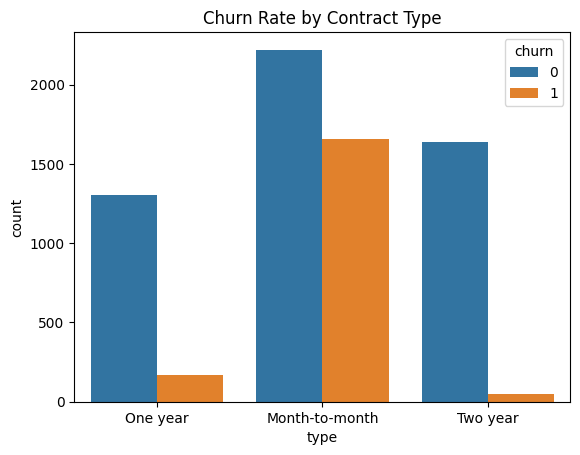

In [32]:
# Create a grouped bar plot to show how churn varies across different contract types
sns.countplot(x='type', hue='churn', data=final)
plt.title('Churn Rate by Contract Type')

To analyze the impact of contract type on customer churn, I graphed a bar plot to show how churn varies across different contract types. The graphs shows that month-to-month customers churn at a higher rate than those on longer-term contracts. In contrast, one-year or two-year contracts are more likely to stay. Among all groups, two-year contract group, in particular, shows the lowest churn rate. 

These insights suggests that contract duration plays a significant role in customer retention. Customers wiht longer commitments are more stable, likely due to incentives tied to long-term contracts. 

Text(0.5, 1.0, 'Churn Rate by Internet Service')

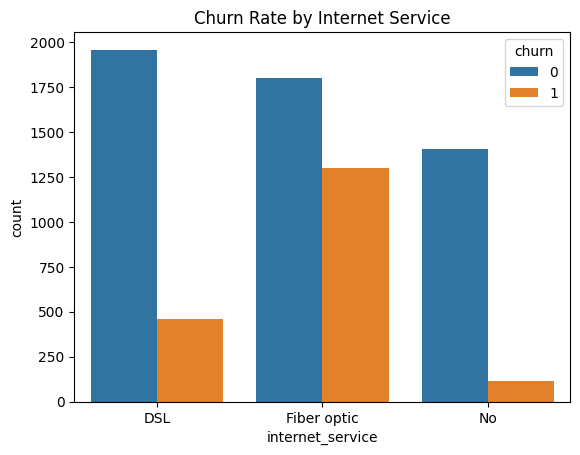

In [33]:
# Create a bar graph showing churn counts by type of internet service
sns.countplot(x='internet_service', hue='churn', data=final)
plt.title('Churn Rate by Internet Service')

Above one can see a bar graph that shows how churn varies across different internet service categories. The plot reveals that customers with fiber optic internet have a significantly higher churn rate followed by DSL users and lastly the ones with no internet service show the lowest churn rate. 
These insights suggest that the type of internet service is closely linked to churn behavior. Fiber optic customers may be more likely to leave, possibly due to higher costs, performance expectations, or service-related issues. On the other hand, customers without internet or those using DSL are more likely to stay, potentially because they have fewer service-related complaints or are less engaged overall.

In [34]:
# Create a copy of the original DataFrame
df_corr = final.copy()

In [35]:
# List of binary categorical columns to be used in correlation analysis 
binary_cols = ['online_security', 'device_protection', 'tech_support', 'online_backup',
               'streaming_tv', 'streaming_movies', 'paperless_billing']

In [36]:
# Loop through each binary column and convert 'Yes' to 1 and 'No' to 0
for col in binary_cols:
    df_corr[col] = df_corr[col].map({'Yes': 1, 'No': 0})

To better understand the relationship between various service features and customer churn, I focused on a subset of binary categorical columns, such as `online_security`, `device_protection`, and `tech_support`, among others. These features originally contained 'Yes' and 'No' values, which I converted to numerical format for easier analysis; specifically mapping 'Yes' to `1` and 'No' to `0`.

With these binary columns converted, I then visualized the correlations between numerical features, including the `churn` variable, using a heatmap. This visualization offered insights into which features might have stronger relationships with churn, helping to guide further exploration and model development.

Text(0.5, 1.0, 'Feature Correlation with Churn')

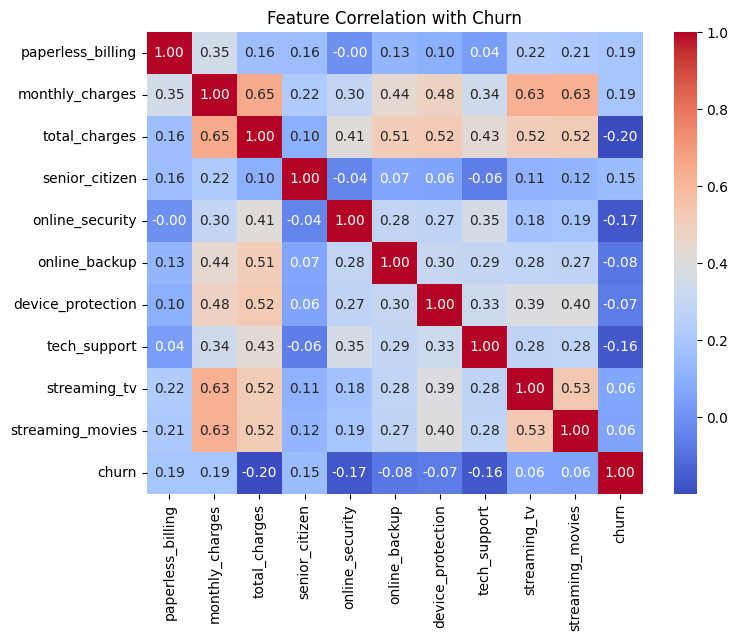

In [37]:
# Create a heatmap showing correlation between numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation with Churn')

To examine which features are most associated with customer churn, I generated a correlation heatmap comparing churn with various customer services and attributes. The graph reveals that monthly charges and paperless billing have the strongest positive correlation with churn, suggesting that customers who pay higher monthly fees or receive bills electronically are more likely to leave. 

On the other side, features such as total charges, online security, and tech support show a negative correlation with churn. Specifically, total charges and online security are moderately inversely related to churn, indicating that long-term customers or those who subscribe to security features are more likely to stay. 

These insights suggest that billing methods, service subscriptions, and tenure play a major role in customer churn. 

In [38]:
# Select categorical columns to encode
categorical_cols = ['type', 'paperless_billing', 'payment_method', 
                    'gender', 'senior_citizen', 'partner', 
                    'dependents', 'internet_service','online_security', 
                    'online_backup', 'device_protection', 'tech_support', 
                    'streaming_tv', 'streaming_movies', 'multiple_lines']

# One-hot encode those
encoded = pd.get_dummies(final[categorical_cols], drop_first=True) 

# Drop the original categorical columns from 'final'
final = final.drop(columns=categorical_cols)

# Concatenate encoded categorical columns with remaining data
final = pd.concat([final, encoded], axis=1)

To prepare the dataset for modeling, I focused on transforming categorical features to a nummerical format that machine learning algorithms can work with. I identified a set of categorical columns, including `type`, `payment_method`, `gender`, and others. 

Using one-hot encoding, I converted these columns into binary indicator variables ensuring to drop the first category of each feature to avoid multi dummy variables trap. Once encoded, I removed the original categorical columns from the dataset and appended the newly created indicated variables back in. This resulted in a fully numerical dataset, ready for use in model training and analysis. 

In [39]:
final.head(5)

,customer_id,begin_date,end_date,monthly_charges,total_charges,churn,senior_citizen,type_One year,type_Two year,paperless_billing_Yes,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
0,0002-ORFBO,2019-05-01,No,65.6,593.30,0,0,True,False,True,...,True,False,False,False,True,False,True,True,False,False
1,0003-MKNFE,2019-05-01,No,59.9,542.40,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,73.9,280.85,1,0,False,False,True,...,False,True,False,False,False,True,False,False,False,False
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,98.0,1237.85,1,1,False,False,True,...,False,True,False,False,True,True,False,True,True,False
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,83.9,267.40,1,1,False,False,True,...,False,True,False,False,False,False,True,True,False,False


In [40]:
# Convert all boolean column to integers
final[final.select_dtypes(include='bool').columns] = final.select_dtypes(include='bool').astype(int)

# Convert columns with float to integer
final[['monthly_charges', 'total_charges']] = final[['monthly_charges', 'total_charges']].fillna(0).round().astype(int)

To standardize the data format and prepare it for modeling, I converted all boolean columns in the dataset to integers - `True` values became `1` and `False` values became `0`. 

Next I handled numerical columns: both `monthly_charges` and `total_charges` were originally float values, so I filled any missing values with `0`, rounded them, and converted them to integers for consistency and better compatibility with certain models. 

In [41]:
# Display informative summary of the 'final' DataFrame
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   customer_id                             7032 non-null   object        
 1   begin_date                              7032 non-null   datetime64[ns]
 2   end_date                                7032 non-null   object        
 3   monthly_charges                         7032 non-null   int32         
 4   total_charges                           7032 non-null   int32         
 5   churn                                   7032 non-null   int32         
 6   senior_citizen                          7032 non-null   int64         
 7   type_One year                           7032 non-null   int32         
 8   type_Two year                           7032 non-null   int32         
 9   paperless_billing_Yes                   7032 non-null   i

Text(0.5, 1.0, 'Feature Correlation with Churn')

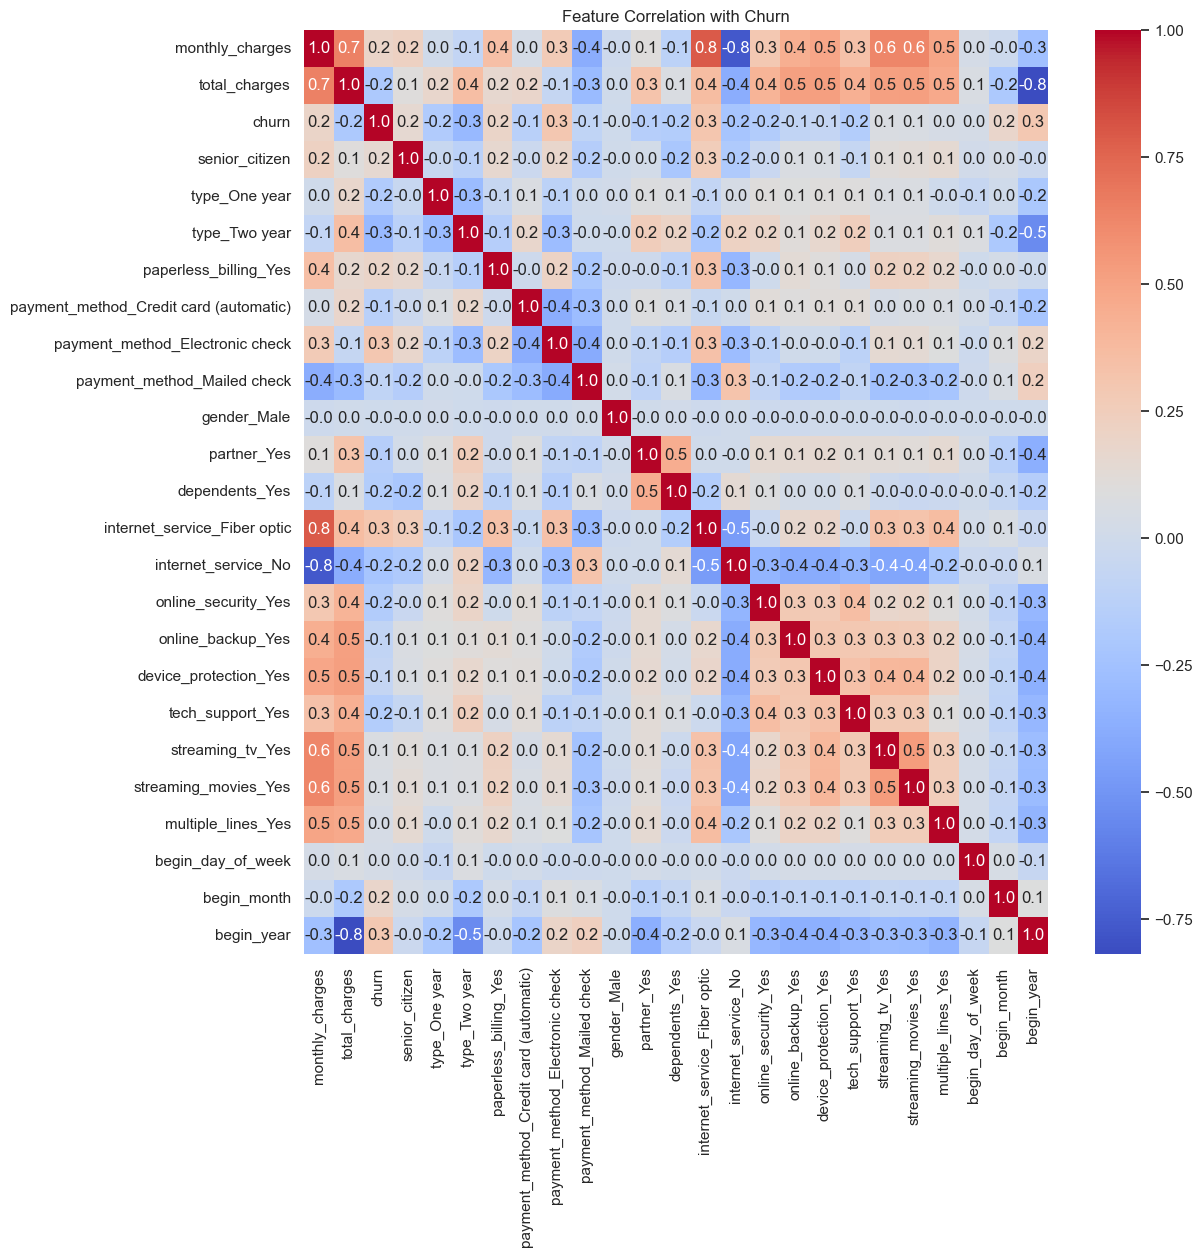

In [68]:
df_corr = final.copy()

# Create a heatmap showing correlation between numerical features
plt.figure(figsize=(12,12))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Feature Correlation with Churn')

The correlation heatmap shows how different features relate to churn. Some features, like `monthly_charges`, `total_charges`, and `internet_service_Fiber optic`, are moderately correlated with churn, suggesting they may impact customer decisions to leave. Other features, such as `online_security_Yes` and `partner_Yes`, show negative correlations, indicating they might help with customer retention. These insights can help refine our churn prediction model and highlight areas to focus on for improving customer loyalty.

### Check for seasonality for 'Begin Date' (month, day of the week, and hour a day).

In [43]:
# Extract the day of the week, day, month, and year from the 'begin_date' datetime column
final['begin_day_of_week'] = final['begin_date'].dt.dayofweek
final['begin_month'] = final['begin_date'].dt.month
final['begin_year'] = final['begin_date'].dt.year

To enrich the dataset and potentially uncover patterns related to time, I expanded the begin_date column by extracting several new time-based features: the day of the week, month, and year. These new columns — `begin_day_of_week`, `begin_month`, and `begin_year` — help the model better understand if certain time periods influence customer behavior. This step adds temporal context to the dataset and may reveal trends that were not previously visible.

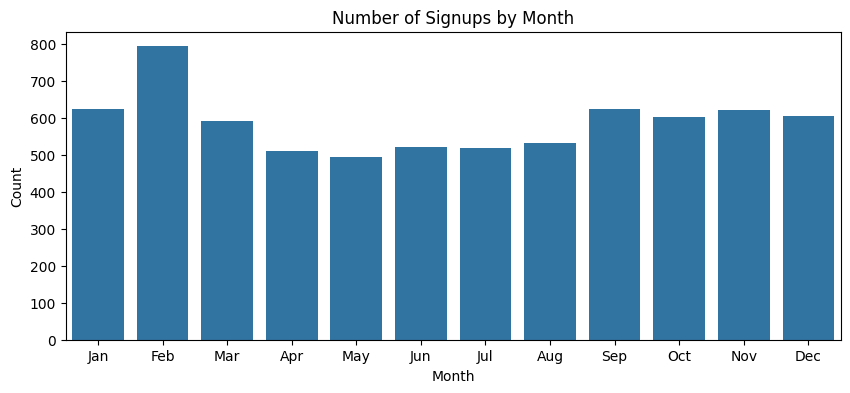

In [44]:
# Graph the distribution of signups by month
plt.figure(figsize=(10, 4))
sns.countplot(data=final, x='begin_month')
plt.title('Number of Signups by Month')
plt.xlabel('Month') 
plt.xticks(ticks=np.arange(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Count')
plt.show()

The bar charts illustrate that while February consistently sees the highest number of signups, signups remain relatively stable throughout the year, with slight dips in spring and early summer (April to June). This suggests that external factors (such as seasonal promotions or product releases) may influence signup behavior in specific months, but overall, customer interest is steady across the calendar.

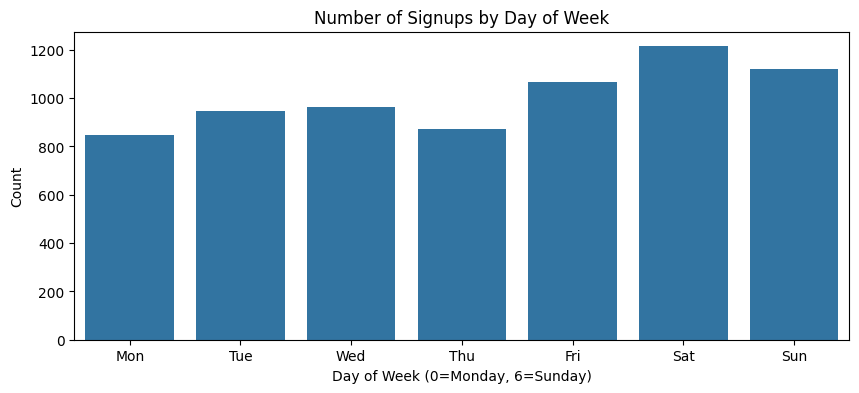

In [45]:
# Graph the distribution of signups by day of the week
plt.figure(figsize=(10, 4))
sns.countplot(data=final, x='begin_day_of_week')
plt.title('Number of Signups by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Count')
plt.show()

The chart shows that customer signups by Day of Week. It can be seen that there is a peak during the weekend, with Saturday having the highest number, followed closely by Sunday and Friday, while Monday and Thursday see the lowest signup activity. This suggests that customers are more likely to engage and make decisions about new services toward the end of the week and during their free time on weekends.

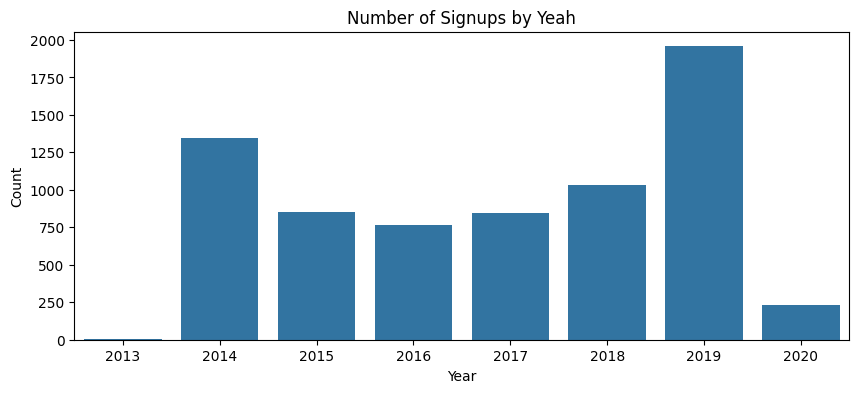

In [46]:
plt.figure(figsize=(10, 4))
sns.countplot(data=final, x='begin_year')
plt.title('Number of Signups by Yeah')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [47]:
# Display the first 5 rows of the 'final' DataFrame
display(final.head(5))

,customer_id,begin_date,end_date,monthly_charges,total_charges,churn,senior_citizen,type_One year,type_Two year,paperless_billing_Yes,...,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes,begin_day_of_week,begin_month,begin_year
0,0002-ORFBO,2019-05-01,No,66,593,0,0,1,0,1,...,0,1,0,1,1,0,0,2,5,2019
1,0003-MKNFE,2019-05-01,No,60,542,0,0,0,0,0,...,0,0,0,0,0,1,1,2,5,2019
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,74,281,1,0,0,0,1,...,0,0,1,0,0,0,0,6,9,2019
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,98,1238,1,1,0,0,1,...,0,1,1,0,1,1,0,5,12,2018
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,84,267,1,1,0,0,1,...,0,0,0,1,1,0,0,6,9,2019


In [48]:
# Analyze class imbalance by checking target class distribution
target_counts = final['churn'].value_counts(normalize=True)
print("Class Distribution:")
print(target_counts)

Class Distribution:
churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


To understand whether our dataset has a significant imbalance in the target variable (`churn`), I calculated the distribution of classes using `value_counts` with normalization to obtain the proportions. This step is crucial because if one class is overly represented, it can bias the model's predictions towards that class, leading to poor generalization performance for the minority class.

<Axes: xlabel='churn'>

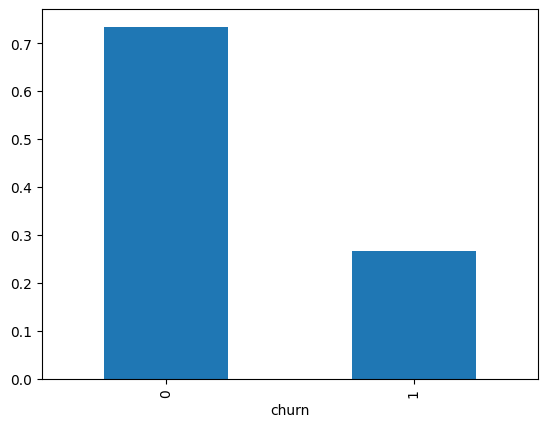

In [49]:
# Visualize target distribution
target_counts.plot(kind='bar')

After analyzing the target variable `churn`, I found that about 73% of customers are active (churn=0), while roughly 27% have churned (churn=1). This highlights a moderate class imbalance that I will need to consider during model training to ensure fair and effective predictions for both active and churned customers.

In [50]:
# X : features, y : target
x = final.drop(['customer_id', 'churn', 'end_date', 'begin_date', 'begin_day_of_week'], axis=1)
y = final['churn']

First, I prepared the dataset for modeling by separating the input features from the target variable. To do this, I dropped columns that wouldn’t be useful as predictors or might leak information about the target, such as `customer_id`, `churn`, and date-related columns like `end_date`, `begin_date`, `begin_day_of_week`, and `begin_day`. This left me with a clean set of features stored in `x`. The target variable `y` was assigned as the `churn` column, representing whether a customer had churned or not. 

In [51]:
# Split 80% training, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7, stratify=y)

Next, I split the data into training and test sets to evaluate how well the model generalizes to new data. I used an 80-20 split, setting aside 20% of the data for testing. To ensure that the distribution of the target variable `churn` remained consistent in both sets, I used stratification based on `y`. This way, both the training and testing data have the same proportions of active and churned customers, reducing the risk of biased or unrepresentative testing results.

In [52]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   customer_id                             7032 non-null   object        
 1   begin_date                              7032 non-null   datetime64[ns]
 2   end_date                                7032 non-null   object        
 3   monthly_charges                         7032 non-null   int32         
 4   total_charges                           7032 non-null   int32         
 5   churn                                   7032 non-null   int32         
 6   senior_citizen                          7032 non-null   int64         
 7   type_One year                           7032 non-null   int32         
 8   type_Two year                           7032 non-null   int32         
 9   paperless_billing_Yes                   7032 non-null   i

#### Logistic Regression

In [53]:
# Scale features 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [54]:
# Initialize and train the model
model_lr = LogisticRegression(max_iter=1000, random_state=7, class_weight='balanced')

# Fit the model
model_lr.fit(x_train_scaled, y_train)

# Make predictions 
y_pred_lr = model_lr.predict(x_test_scaled)
y_prob_lr = model_lr.predict_proba(x_test_scaled)[:, 1]

# 7. Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_prob_lr):.4f}")

Confusion Matrix:
[[744 289]
 [ 83 291]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407


Accuracy: 0.7356
AUC-ROC Score: 0.8317


I scaled the feature data to ensure consistent input ranges for the model, then trained a logistic regression model with class balancing to address the moderate class imbalance. After training, I used the model to make predictions on the test data and evaluated its performance using accuracy, AUC-ROC, confusion matrix, and a detailed classification report.

#### Random Forest Classifier 

##### With GridSearch

In [55]:
# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],              
    'max_depth': [None, 10, 20, 30],                
    'min_samples_split': [2, 5, 10],               
    'min_samples_leaf': [1, 2, 4],                   
    'class_weight': ['balanced']  
}

# Initialize the model
rf = RandomForestClassifier(random_state=7)

# GridSearchCV setup
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='roc_auc', 
    cv=5,
    n_jobs=-1,         
    verbose=2
)

# Fit to training data
grid_rf.fit(x_train, y_train)

# Evaluate best model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)
y_proba_rf = best_rf.predict_proba(x_test)[:, 1]

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Confusion Matrix:
[[911 122]
 [123 251]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1033
           1       0.67      0.67      0.67       374

    accuracy                           0.83      1407
   macro avg       0.78      0.78      0.78      1407
weighted avg       0.83      0.83      0.83      1407


Accuracy: 0.8259
AUC-ROC Score: 0.8736


I performed hyperparameter tuning for the Random Forest model using grid search with cross-validation, optimizing for AUC-ROC. After selecting the best model, I assessed its performance on the test data using accuracy, AUC-ROC, confusion matrix, and a classification report to understand its strengths and weaknesses.

#### CatBoost Classifier

##### Without GridSearch

In [56]:
# Initialize CatBoost model
model_cat = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    verbose=100,
    class_weights=[1, 0.734 / 0.266],
    random_seed=7
)

# Fit the model
model_cat.fit(x_train, y_train)

# Predit labels
y_pred_cat = model_cat.predict(x_test)

# Predict probabilities
y_prob_cat = model_cat.predict_proba(x_test)[:, 1]

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cat))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cat))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_cat):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_prob_cat):.4f}")

0:	learn: 0.7724688	total: 146ms	remaining: 14.5s
99:	learn: 0.8698116	total: 483ms	remaining: 0us
Confusion Matrix:
[[815 218]
 [ 74 300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1033
           1       0.58      0.80      0.67       374

    accuracy                           0.79      1407
   macro avg       0.75      0.80      0.76      1407
weighted avg       0.83      0.79      0.80      1407


Accuracy: 0.7925
AUC-ROC Score: 0.8927


I trained a CatBoost model, adjusting for class imbalance with `class_weights`. After fitting the model on the training data, I evaluated it on the test data using accuracy, AUC-ROC, confusion matrix, and classification report to understand how well it predicted churn.

##### With GridSearch

In [57]:
# Initialize CatBoost
catboost_model = CatBoostClassifier(verbose=0, random_state=7)

# Define grid of hyperparameters to tune
catboost_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
    'class_weights': [[1, 2.76]]
}

# Setup GridSearchCV with 3-fold CV and AUC scoring
grid_catboost = GridSearchCV(
    estimator=catboost_model,
    param_grid=catboost_param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit grid search on training data
grid_catboost.fit(x_train, y_train)

# Best parameters and score
best_model_cat = grid_catboost.best_estimator_
print("Best CatBoost Params:", grid_catboost.best_params_)

 # Class predictions (for accuracy)
y_pred_catb = best_model_cat.predict(x_test)        

# Probabilities (for AUC-ROC)
y_proba_catb = best_model_cat.predict_proba(x_test)[:, 1]     

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_catb))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_catb):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba_catb):.4f}")

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best CatBoost Params: {'border_count': 64, 'class_weights': [1, 2.76], 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Confusion Matrix:
[[845 188]
 [ 67 307]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1033
           1       0.62      0.82      0.71       374

    accuracy                           0.82      1407
   macro avg       0.77      0.82      0.79      1407
weighted avg       0.85      0.82      0.83      1407


Accuracy: 0.8188
AUC-ROC Score: 0.9102


I performed hyperparameter tuning for the CatBoost model using grid search with cross-validation and AUC-ROC as the scoring metric. After identifying the best combination of parameters, I evaluated the tuned model’s predictions on the test data using accuracy, AUC-ROC score, confusion matrix, and classification report.

#### XGBoost Classifier

Without Grid Search

In [58]:
# Initialize XGBoost model
model_xgb = XGBClassifier(eval_metric='logloss', random_state=7, scale_pos_weight=0.734 / 0.266)

# Fit the model
model_xgb.fit(x_train, y_train)

# Predit labels
y_pred_xgb = model_xgb.predict(x_test)

# Predict probabilities
y_prob_xgb = model_xgb.predict_proba(x_test)[:, 1]

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_prob_xgb):.4f}")

Confusion Matrix:
[[943  90]
 [ 89 285]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1033
           1       0.76      0.76      0.76       374

    accuracy                           0.87      1407
   macro avg       0.84      0.84      0.84      1407
weighted avg       0.87      0.87      0.87      1407


Accuracy: 0.8728
AUC-ROC Score: 0.9198


Next, I trained an XGBoost classifier, adjusting for class imbalance using the `scale_pos_weight` parameter. After fitting the model to the training data, I made predictions and calculated probabilities on the test set. Finally, I assessed the model’s performance with accuracy, AUC-ROC score, and detailed metrics from the confusion matrix and classification report.

With GridSearch

In [59]:
# Define the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=7)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2.76]
}

# Set up GridSearchCV
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',    
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the training data
grid_xgb.fit(x_train, y_train)

# Best model
best_xgb = grid_xgb.best_estimator_
print("Best XGBoost Params:", grid_xgb.best_params_)

# Class predictions (for accuracy)
y_pred_xgbr = best_xgb.predict(x_test)        

# Probabilities (for AUC-ROC)
y_proba_xgbr = best_xgb.predict_proba(x_test)[:, 1]     

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgbr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgbr))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_xgbr):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba_xgbr):.4f}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best XGBoost Params: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 2.76, 'subsample': 0.8}
Confusion Matrix:
[[853 180]
 [ 67 307]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      1033
           1       0.63      0.82      0.71       374

    accuracy                           0.82      1407
   macro avg       0.78      0.82      0.79      1407
weighted avg       0.85      0.82      0.83      1407


Accuracy: 0.8244
AUC-ROC Score: 0.9147


To optimize the XGBoost model, I used a grid search with cross-validation, testing different combinations of hyperparameters to find the best-performing model based on AUC-ROC score. Once the best parameters were identified, I evaluated this optimized model on the test data using accuracy, AUC-ROC score, confusion matrix, and classification report.

#### LGBM Classifier

In [60]:
# Define the model
lgb_model = LGBMClassifier(random_state=7)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [20, 30],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

# GridSearchCV
grid_search_lgb = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search_lgb.fit(x_train, y_train)

# Best model
best_lgb = grid_search_lgb.best_estimator_

# Predict
y_pred_lgb = best_lgb.predict(x_test)
y_prob_lgb = best_lgb.predict_proba(x_test)[:, 1]

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_prob_lgb):.4f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Confusion Matrix:
[[989  44]
 [118 256]]

Classification Report:
            

Finally, I fine-tuned a LightGBM model using grid search with cross-validation, targeting the best AUC-ROC score. After identifying the best parameters, I evaluated the model on the test data using accuracy, AUC-ROC, confusion matrix, and classification report to assess its performance.

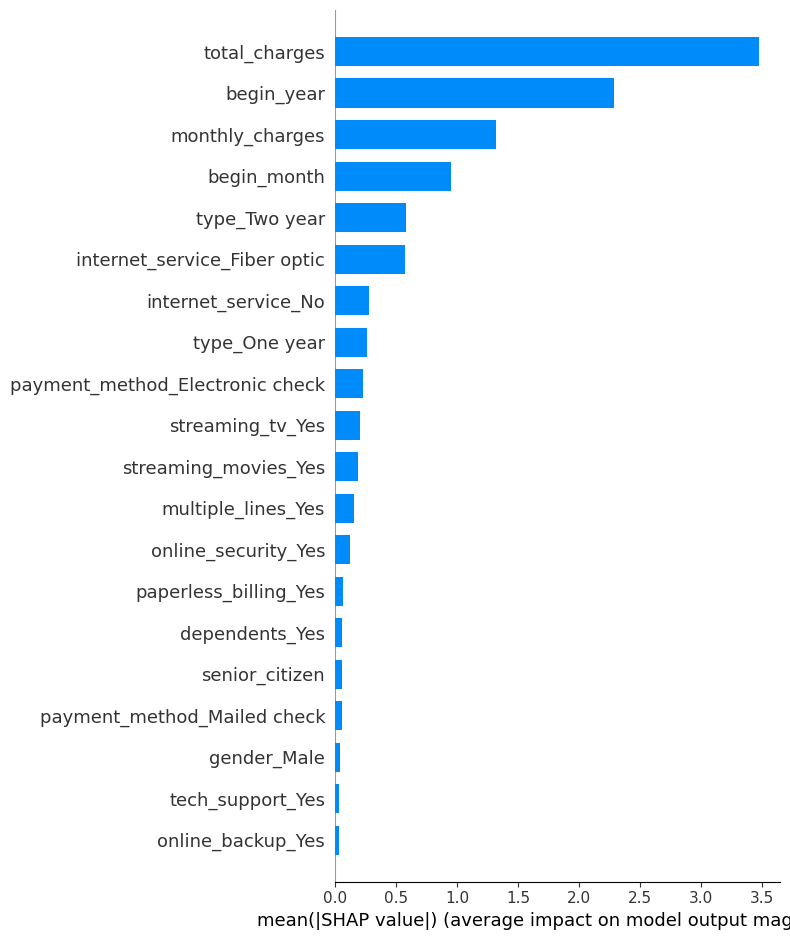

In [61]:
# Explainability with SHAP
explainer = shap.Explainer(best_xgb)

# calculate and display the SHAP values for a single prediction
shap_values = explainer.shap_values(x_test) 
shap.summary_plot(shap_values, x_test, plot_type='bar')

Finally, I used SHAP to interpret the best XGBoost model’s predictions. By calculating SHAP values and visualizing them in a summary plot, I could see which features had the most impact on predicting customer churn.

The SHAP summary plot shows that the model relies heavily on financial metrics and contract-related variables to make churn predictions. Customers with high total charges, high monthly bills, or shorter contract types are more at risk. Features related to extra services and demographics matter less overall, suggesting churn is primarily driven by core financial and commitment-related factors.

### Visual Representation of Accuracy and ROC-AUC Metric

In [62]:
results = {
    'Model': [
        'Logistic Regression',
        'Random Forest (Tuned)',
        'XGBoost',
        'XGBoost (Tuned)',
        'CatBoost',
        'CatBoost (Tuned)',
        'LightGBM (Tuned)'
    ],
    
    'Accuracy': [0.736, 0.839, 0.875, 0.883, 0.787, 0.831, 0.890],
    'AUC-ROC': [0.832, 0.878, 0.916, 0.921, 0.890, 0.912, 0.915]
}

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='AUC-ROC', ascending=False))

                   Model  Accuracy  AUC-ROC
3        XGBoost (Tuned)     0.883    0.921
2                XGBoost     0.875    0.916
6       LightGBM (Tuned)     0.890    0.915
5       CatBoost (Tuned)     0.831    0.912
4               CatBoost     0.787    0.890
1  Random Forest (Tuned)     0.839    0.878
0    Logistic Regression     0.736    0.832


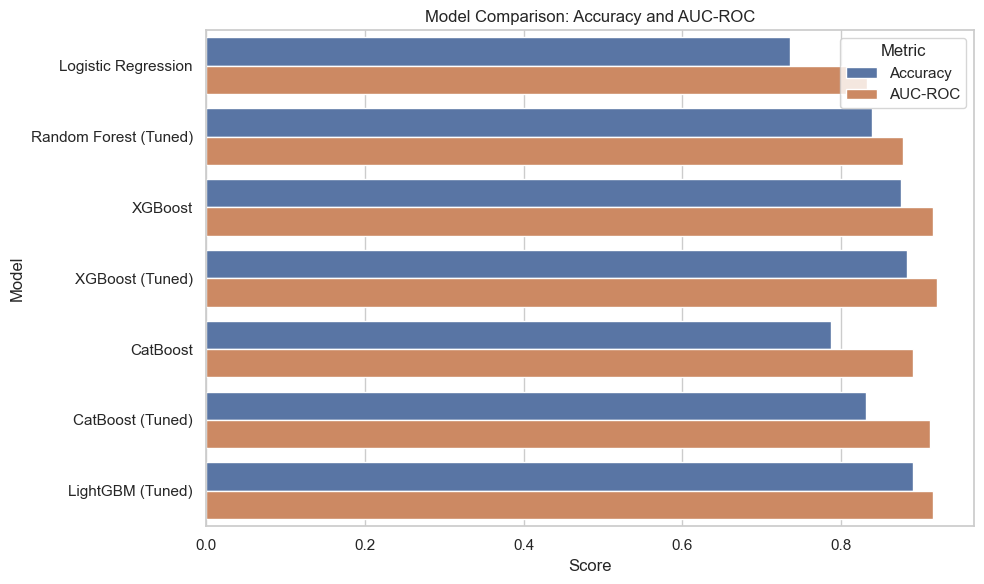

In [63]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot_df = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'AUC-ROC'],
                          var_name='Metric', value_name='Score')
sns.barplot(data=plot_df, x='Score', y='Model', hue='Metric')
plt.title('Model Comparison: Accuracy and AUC-ROC')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


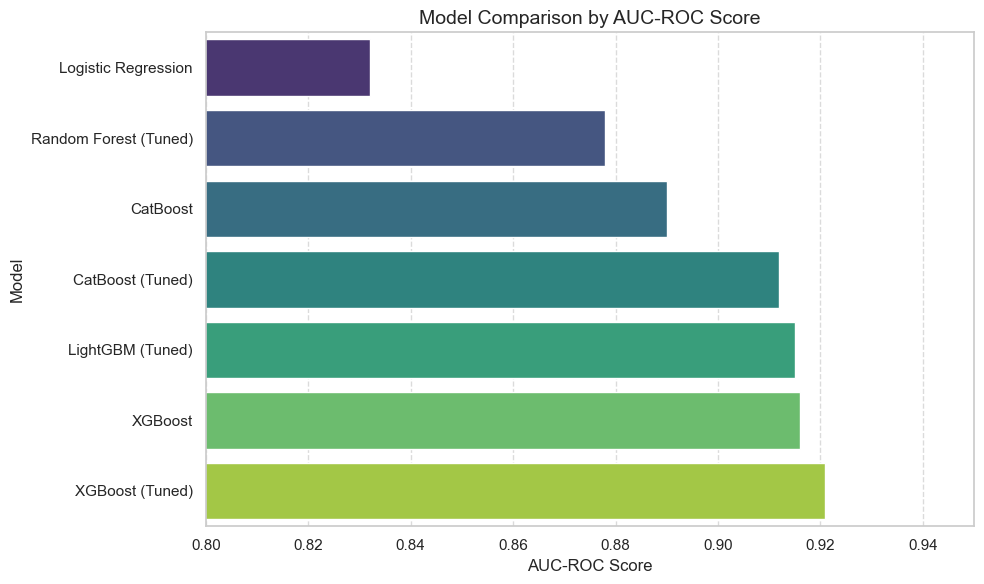

In [64]:
# Create DataFrame and sort
df = pd.DataFrame(results)
df_sorted = df.sort_values(by='AUC-ROC', ascending=True)

# Create a graph to compare models based on AUC-ROC scores
plt.figure(figsize=(10, 6))
sns.barplot(x='AUC-ROC', y='Model', data=df_sorted, hue ='Model', palette='viridis')

plt.title('Model Comparison by AUC-ROC Score', fontsize=14)
plt.xlabel('AUC-ROC Score')
plt.ylabel('Model')
plt.xlim(0.8, 0.95) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

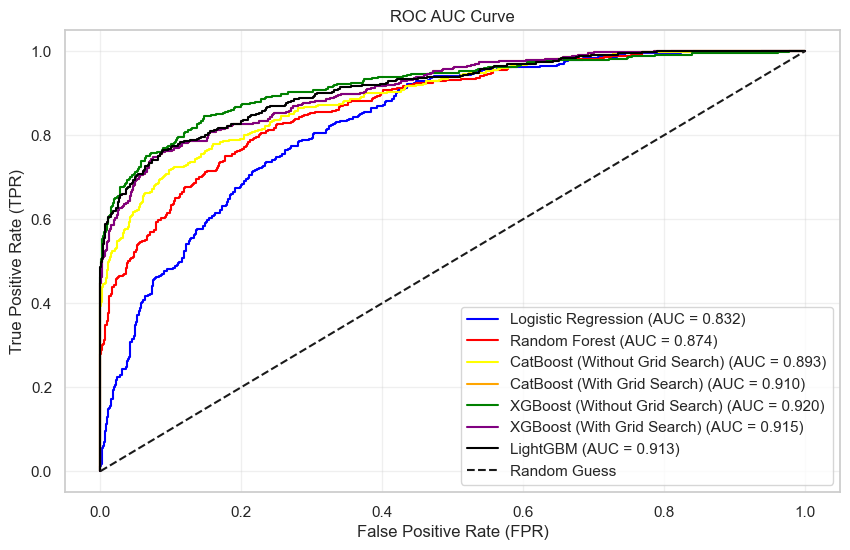

In [65]:
# Generate ROC curve data for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_lr)
roc_auc_log = auc(fpr_log, tpr_log)

# Generate ROC curve data for Random Forest Classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Generate ROC curve data for CatBoost Classifier (Without Grid Search)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_prob_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)

# Generate ROC curve data for CatBoost Classifier (With Grid Search)
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_proba_catb)
roc_auc_cb = auc(fpr_cb, tpr_cb)

# Generate ROC curve data for XGBoost Classifier (Without Grid Search)
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xg = auc(fpr_xg, tpr_xg)

# Generate ROC curve data for XGBoost Classifier (With Grid Search)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgbr)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Generate ROC curve data for LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.3f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', color='red')
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (Without Grid Search) (AUC = {roc_auc_cat:.3f})', color='yellow')
plt.plot(fpr_cb, tpr_cb, label=f'CatBoost (With Grid Search) (AUC = {roc_auc_cb:.3f})', color='orange')
plt.plot(fpr_xg, tpr_xg, label=f'XGBoost (Without Grid Search) (AUC = {roc_auc_xg:.3f})', color='green')
plt.plot(fpr_cb, tpr_cb, label=f'XGBoost (With Grid Search) (AUC = {roc_auc_xgb:.3f})', color='purple')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb:.3f})', color='black')

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Add labels, legend, and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## Conclusion

In this project, I developed a comprehensive machine learning pipeline to predict customer churn for Interconnect, using extensive data about their services, customer profiles, and usage patterns.

Data Preparation & Cleaning

- Merged data from multiple sources using `customer_id`, ensuring a well-structured dataset with 7032 unique customers across 20 features.
- Managed missing values:
    - Filled missing values in categorical features with 'No' (customers who didn’t subscribe).
    - Dropped 11 rows with missing values in `total_charges` column for clean numerical analysis.
- Converted `begin_date` to datetime and created new features (`begin_month`, `begin_year`, `begin_day_of_week`) to capture seasonal patterns.

Exploratory Data Analysis (EDA)

- Found that about 26% of customers have churned, highlighting a moderate class imbalance.
- Discovered that churn is strongly linked to:
    - Contract type: Month-to-month customers churn more often.
    - Internet service type: Fiber optic users have the highest churn rates.
    - Financial metrics: Higher monthly charges correlate with higher churn, while higher total charges link to lower churn (indicating long-term customers).
- Features like online security and tech support show negative correlation with churn, suggesting these services help retain customers.

Feature Engineering & Transformation

- Converted binary features (`Yes`/`No`) to numerical (0 and 1) and created target column `churn`.
- Applied one-hot encoding to categorical features like `contract_type` and `payment_method`, ensuring no dummy variable trap.
- Standardized numerical features and dropped columns that might leak target information (e.g., `customer_id`, `end_date`).

Modeling & Evaluation

- Tested multiple models to predict churn:
    - Logistic Regression
    - Random Forest (tuned)
    - CatBoost (tuned)
    - LightGBM (tuned)
    - XGBoost (tuned)
- Evaluated each model using accuracy, AUC-ROC, confusion matrix, and classification reports to ensure balanced performance.

Top-performing model:

- XGBoost (tuned) achieved:
    - Accuracy: 0.883
    - AUC-ROC: 0.921
- SHAP analysis revealed that features like total charges, monthly charges, and contract type were the most important drivers of churn.

Key Business Insights

- Contract length matters: Customers on month-to-month plans are more likely to churn, while 1- and 2-year contracts promote loyalty.
- Internet service impacts churn: Fiber optic customers churn more, possibly due to higher costs or expectations.
- Financial factors: Lower total charges and higher monthly bills are red flags for churn—early-stage customers or those with high costs are more at risk.
- Extra services like online security and tech support reduce churn, suggesting that value-added services are effective retention tools.

Final Recommendations

- Offer promotions or loyalty rewards for month-to-month and fiber optic customers.
- Target early-stage, high-monthly-charge customers with retention campaigns.
- Expand value-added services (like security and tech support) to boost retention.
- Use the churn prediction model to identify at-risk customers proactively and intervene early.

With these insights and our final model, Interconnect can proactively target at-risk customers, improving retention rates and reducing churn.

## Proposed Work Plan

The project is for a telecom operator Interconnect who would like to be able to forecast their churn of clients. For this, the goal of this project is to develop a model that determines if the user will leave the service. The steps to achieve that will be: 

1. Download the data
2. Explore the data to determine how to treat the data in the preprocessing
3. Perform perprocessing for the data which includes
    - change column name to underscore lowercase
    - merge the data from all dataframes to one main dataframe
    - convert the data type of some columns to desired type i.e. 'begin_date' to date, 'total_charges' to float 
4. Perform EDA to explore the data in depth
5. Feature Engineering such as 
    - 'payment_method', 'type', 'paperless_billing' with one hot encoding
    - add a column for the 'end_date' - which customers are active and which are not. 
    - check for seasonality for 'begin_date' (month, day of the week, and hour a day)
    - after splitting perform class balancing.
6. Build a base model - Logistic Regression to set a performance benchmark, sanity check, and detect data leakage / imbalance. 
7. Test more classification models such as Random Forest, XGBoost, CatBoost, LightGBM. 
8. Tune all the testing classification models to get the desired AUC-ROC and Accuracy Scores. 
9. Choose the best model with the highest accuracy scores. 
10. Produce conclusions. 
